## Starting Lasso Regression by Finding a limit point

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("Datasets/preprocessed_dataset.csv")
df = df.drop(["Unnamed: 0","id"],axis=1)
df

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,21,0.485152,1,0.003233,0.001623,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,-0.491182,0,0.003233,0.001623,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,1.705571,1,1.989114,-0.766671,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,1.522508,1,0.003233,0.001623,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
502,13,0.485152,0,0.003233,-1.378426,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
503,19,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,9,0.485152,1,0.003233,0.079954,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
df.hospital_length_of_stay.describe()

count    506.000000
mean      12.458498
std       11.918837
min        1.000000
25%        5.000000
50%        8.500000
75%       15.000000
max       81.000000
Name: hospital_length_of_stay, dtype: float64

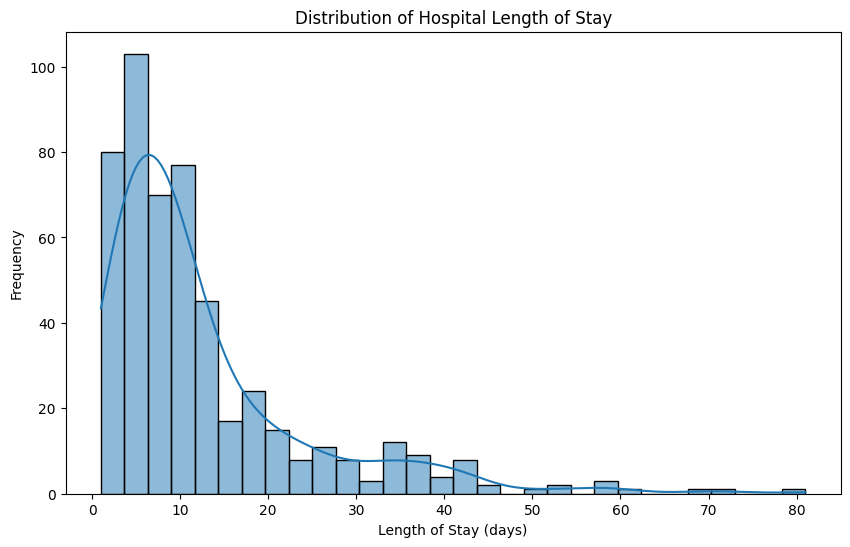

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and hospital_length_of_stay is the column of interest
plt.figure(figsize=(10, 6))
sns.histplot(df['hospital_length_of_stay'], bins=30, kde=True)
plt.title('Distribution of Hospital Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()


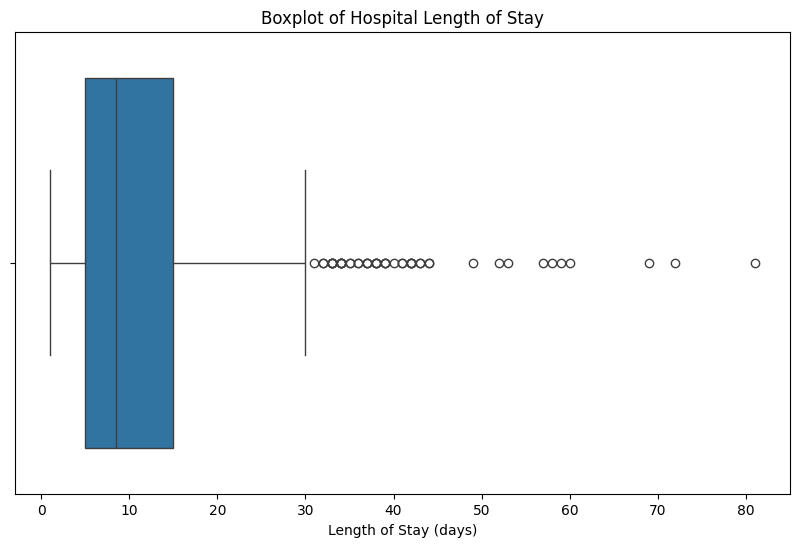

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hospital_length_of_stay'])
plt.title('Boxplot of Hospital Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.show()


## Adding columns from the Canada Hospital Dataset
### We will be adding rest of the columns from the data at admission after the column previous_er_visit_within_14_days

In [6]:
## one hot encoded data
xls = pd.ExcelFile('/Users/asheshlalshrestha/Desktop/UB/Research/CarePathways/Models/Datasets/PhyAdRsnComorbMed.xlsx')
## canada dataset
xls2 = pd.ExcelFile("../Canada_Hosp1_COVID_InpatientData.xlsx")

df = pd.read_excel(xls2,'Data-at-admission')
df1 = pd.read_excel(xls, 'Hospital-length-of-stay')
df2 = pd.read_excel(xls, 'Data-at-admission')

### We only need 'Hospital-length-of-stay' from df1

In [7]:
df1 = df1[['parent_id','hospital_length_of_stay']]
df1

,parent_id,hospital_length_of_stay
0,1,21
1,2,5
2,3,7
3,4,9
4,5,9
...,...,...
503,517,19
504,519,9
505,521,7
506,522,5


### Merging df1 and df2 based on id

In [8]:
df1.rename(columns={'parent_id': 'id'}, inplace=True)
df3 = pd.merge(df1, df2,on='id', how='inner')
df3

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,year_they_quit,previous_er_visit_within_14_days,admission_disposition,...,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,Rybelsus,Prozac Capsules,Methylprednisolone Acetate Injectable Suspension Usp
0,1,21,74,1,NaN,NaN,NaN,NaN,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2,5,61,0,154.9,73.6,NaN,NaN,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,3,7,58,0,NaN,NaN,NaN,NaN,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,4,9,94,1,182.8,66.2,NaN,NaN,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,5,9,91,1,NaN,NaN,1.0,NaN,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,517,19,81,1,158.0,65.0,NaN,NaN,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
504,519,9,74,1,NaN,81.7,NaN,0.0,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
505,521,7,48,0,180.0,95.3,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,522,5,73,1,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Only selecting columns after "previous_er_visit_within_14_days "

In [19]:
df.drop(df.columns[1:16], axis=1)

,id,admission_disposition,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,motor,verbal,...,pao2,pao2_fio2,ph,high_senstivity_cardiac_troponin,esr,inr,ferritin,d_dimer,crp,hs_crp
0,1,WARD,99,62,85,20,93,37.5,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,223.0,NaN
1,2,WARD,122,77,93,36,88,38.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2354,95.6,NaN
2,3,WARD,109,72,73,24,91,38.3,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,WARD,165,71,92,16,96,37.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,WARD,131,76,60,18,95,38.2,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,516,WARD,153,123,98,24,74,35.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
504,517,WARD,161,81,161,55,84,38.8,6.0,4.0,...,76.0,1.5,7.44,NaN,NaN,NaN,NaN,>4000,NaN,NaN
505,519,WARD,171,105,66,20,95,37.8,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN
506,521,WARD,155,94,95,18,100,38.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,428,NaN,NaN


In [9]:
# Drop columns at index positions 1 to 15
df = df.drop(df.columns[1:16], axis=1)
df

,id,admission_disposition,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,motor,verbal,...,pao2,pao2_fio2,ph,high_senstivity_cardiac_troponin,esr,inr,ferritin,d_dimer,crp,hs_crp
0,1,WARD,99,62,85,20,93,37.5,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,223.0,NaN
1,2,WARD,122,77,93,36,88,38.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2354,95.6,NaN
2,3,WARD,109,72,73,24,91,38.3,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,WARD,165,71,92,16,96,37.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,WARD,131,76,60,18,95,38.2,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,516,WARD,153,123,98,24,74,35.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
504,517,WARD,161,81,161,55,84,38.8,6.0,4.0,...,76.0,1.5,7.44,NaN,NaN,NaN,NaN,>4000,NaN,NaN
505,519,WARD,171,105,66,20,95,37.8,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN
506,521,WARD,155,94,95,18,100,38.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,428,NaN,NaN


In [10]:
from sklearn.preprocessing import LabelEncoder

## Label encoding admission_disposition_y
label_encoder = LabelEncoder()

# Fit and transform the column
df['admission_disposition_encoded'] = label_encoder.fit_transform(df['admission_disposition'])
df['intubated_encoded'] = label_encoder.fit_transform(df['intubated'])

## converting to numeric
df['aptt_aptr'] = pd.to_numeric(df['aptt_aptr'], errors='coerce')

## droping unencoded columns
df = df.drop(['admission_disposition','intubated','high_senstivity_cardiac_troponin','hs_crp'],axis=1)

# Define a function to handle the conversion of obj type column to int or float
def convert_to_float(value):
    if isinstance(value, str):
        if value.startswith('<'):
            # Convert "<value" to a float slightly less than the numeric value
            return float(value[1:]) - 0.01
        elif value.startswith('>'):
            # Convert ">value" to a float slightly greater than the numeric value
            return float(value[1:]) + 0.01
    return float(value)

# Apply the function to the column
df['d_dimer'] = df['d_dimer'].apply(convert_to_float)

## dealing with null values
## we will use the null values to be replaced by the average value of the columns as a person cannot have 0 hemoglobin in the body
df = df.fillna(df.mean())
df.head()

,id,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,motor,verbal,eye,...,pao2,pao2_fio2,ph,esr,inr,ferritin,d_dimer,crp,admission_disposition_encoded,intubated_encoded
0,1,99,62,85,20,93,37.5,6.0,4.0,4.0,...,77.90625,1.5,7.3475,61.8,1.100000,1003.75,1346.416825,223.000000,1,0
1,2,122,77,93,36,88,38.0,6.0,5.0,4.0,...,77.90625,1.5,7.3475,61.8,1.000000,1003.75,2354.000000,95.600000,1,0
2,3,109,72,73,24,91,38.3,6.0,5.0,3.0,...,77.90625,1.5,7.3475,61.8,1.159365,1003.75,1346.416825,109.128873,1,0
3,4,165,71,92,16,96,37.5,6.0,5.0,4.0,...,77.90625,1.5,7.3475,61.8,1.159365,1003.75,1346.416825,109.128873,1,0
4,5,131,76,60,18,95,38.2,6.0,5.0,4.0,...,77.90625,1.5,7.3475,61.8,1.159365,1003.75,1346.416825,109.128873,1,0


### Merging df (new columns) and df3 

In [11]:
df3 = pd.merge(df3, df,on='id', how='inner')
df3

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,year_they_quit,previous_er_visit_within_14_days,admission_disposition,...,pao2,pao2_fio2,ph,esr,inr,ferritin,d_dimer,crp,admission_disposition_encoded,intubated_encoded
0,1,21,74,1,NaN,NaN,NaN,NaN,0,1,...,77.90625,1.5,7.3475,61.8,1.100000,1003.75,1346.416825,223.000000,1,0
1,2,5,61,0,154.9,73.6,NaN,NaN,0,1,...,77.90625,1.5,7.3475,61.8,1.000000,1003.75,2354.000000,95.600000,1,0
2,3,7,58,0,NaN,NaN,NaN,NaN,0,1,...,77.90625,1.5,7.3475,61.8,1.159365,1003.75,1346.416825,109.128873,1,0
3,4,9,94,1,182.8,66.2,NaN,NaN,0,1,...,77.90625,1.5,7.3475,61.8,1.159365,1003.75,1346.416825,109.128873,1,0
4,5,9,91,1,NaN,NaN,1.0,NaN,0,1,...,77.90625,1.5,7.3475,61.8,1.159365,1003.75,1346.416825,109.128873,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,517,19,81,1,158.0,65.0,NaN,NaN,1,1,...,76.00000,1.5,7.4400,61.8,1.159365,1003.75,4000.010000,109.128873,1,0
504,519,9,74,1,NaN,81.7,NaN,0.0,1,1,...,77.90625,1.5,7.3475,61.8,1.500000,1003.75,1346.416825,109.128873,1,0
505,521,7,48,0,180.0,95.3,NaN,NaN,1,1,...,77.90625,1.5,7.3475,61.8,1.000000,1003.75,428.000000,109.128873,1,0
506,522,5,73,1,NaN,NaN,NaN,NaN,1,1,...,77.90625,1.5,7.3475,61.8,1.100000,1003.75,1584.000000,109.128873,1,0


### Following the same steps as the notebook feature_engineering

In [12]:
df3['height'] = df3['height'].fillna(df3['height'].mean())
df3['weight'] = df3['weight'].fillna(df3['weight'].mean())
df3 = df3.drop(['year_they_quit','Methylprednisolone Acetate Injectable Suspension Usp','Prozac Capsules','Rybelsus'],axis=1)
df3['smoking_history']=df3['smoking_history'].fillna(0)
df3 = df3.fillna(0)

In [13]:
a = df3.isnull().sum().reset_index(name='Null counts')
# a.to_csv('null.csv')

In [14]:
# df3.to_csv("column_added_dataset.csv")

In [15]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['age', 
                          'height',
                          'weight',
                          "systolic_blood_pressure",
                          "diastolic_blood_pressure",
                          "heart_rate",
                          "respiratory_rate",
                          "oxygen_saturation",
                          "temperature",
                          "motor",
                          "verbal",
                          "eye",
                          "wbc",
                          "rbc",
                          "hemoglobin",
                          "hematocrit",
                          "mcv",
                          "mch",
                          "mchc",
                          "rdw",
                          "platelet_count",
                          "aptt_aptr",
                          "pt",
                          "alt",
                          "ast",
                          "serum_creatinine",
                          "sodium",
                          "potassium",
                          "total_serum_bilirubin",
                          "lactate",
                          "pao2",
                          "pao2_fio2",
                          "ph",
                          "esr",
                          "inr",
                          "ferritin",
                          "d_dimer",
                          "crp"]


# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns using the scaler
df3[columns_to_standardize] = scaler.fit_transform(df3[columns_to_standardize])

In [17]:
df3.head()

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,pao2,pao2_fio2,ph,esr,inr,ferritin,d_dimer,crp,admission_disposition_encoded,intubated_encoded
0,1,21,0.486777,1,3.549903e-15,0.000000,0.0,0,1,1,...,0.0,0.0,8.243049e-14,2.340288e-15,-1.116803e-01,0.0,0.000000,2.887190e+00,1,0
1,2,5,-0.306970,0,-1.500191e+00,-0.364575,0.0,0,1,1,...,0.0,0.0,8.243049e-14,2.340288e-15,-2.998049e-01,0.0,1.595746,-3.430231e-01,1,0
2,3,7,-0.490142,0,3.549903e-15,0.000000,0.0,0,1,1,...,0.0,0.0,8.243049e-14,2.340288e-15,4.177205e-16,0.0,0.000000,-3.603147e-16,1,0
3,4,9,1.707926,1,1.984550e+00,-0.769298,0.0,0,1,1,...,0.0,0.0,8.243049e-14,2.340288e-15,4.177205e-16,0.0,0.000000,-3.603147e-16,1,0
4,5,9,1.524754,1,3.549903e-15,0.000000,1.0,0,1,1,...,0.0,0.0,8.243049e-14,2.340288e-15,4.177205e-16,0.0,0.000000,-3.603147e-16,1,0


In [18]:
# df3.to_csv("new_dataset`_added_column_scaled.csv")